In [1]:
#importing necessary libraries and frameworks
import tensorflow as tf
import torch
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.datasets import cifar10
import seaborn as sns

import keras
from tensorflow.keras import layers
from keras.utils import to_categorical


2024-02-24 06:43:42.768187: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 06:43:42.768294: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 06:43:42.924442: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

170498071/170498071 [==============================] - 8s 0us/step
X train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
X test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


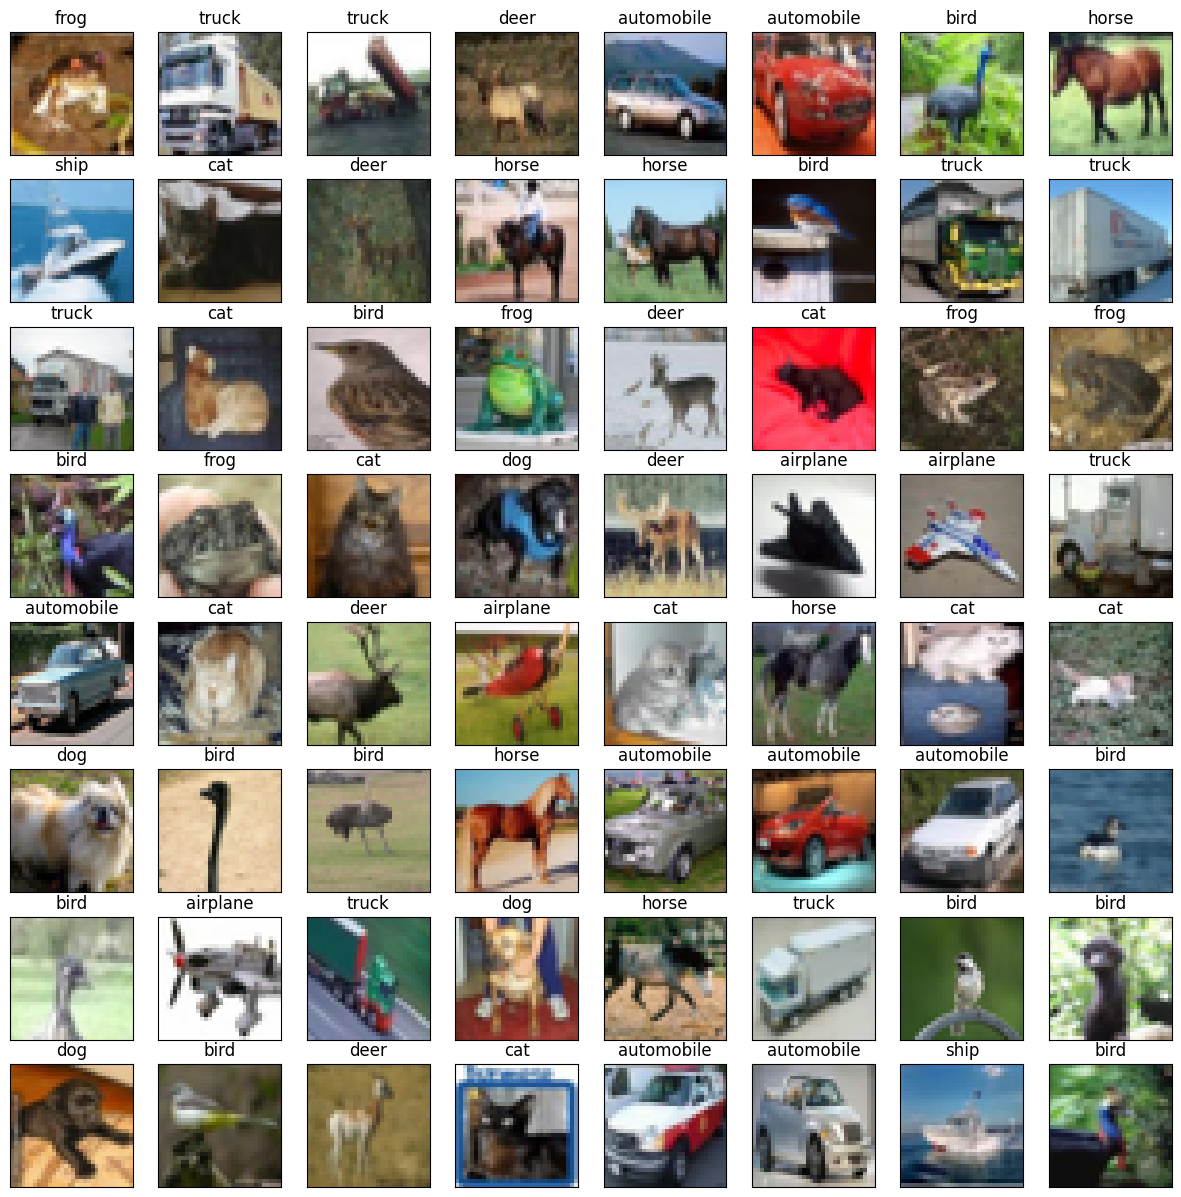

In [3]:
# displaying the sample image from each class:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# create a new figure
plt.figure(figsize=(15,15))

#displaying 64 images 
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

# Data Preprocessing

### Flattening, and Normalising the Images

3072 = 32 * 32 * 3

In [4]:
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

### One-hot encoding the labels for training and testing

In [7]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

print(f"Shape before one-hot encoding: {y_train.shape}; e.g. {y_train[0]}")
print(f"Shape after one-hot encoding: {Y_train.shape}; e.g. {Y_train[0]}")

Shape before one-hot encoding: (50000, 1); e.g. [6]
Shape after one-hot encoding: (50000, 10); e.g. [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
